In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout,Conv1D,MaxPooling1D,LSTM,BatchNormalization

from keras import metrics,layers
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

labelencoder = LabelEncoder()
scaler = MinMaxScaler()

In [2]:
df = pd.read_csv('adult.data',header=None,encoding='utf-8')
td = pd.read_csv('adult.test',header=None,encoding='utf-8')

In [3]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
td.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df=df.replace({' ?':np.nan}).dropna()

In [5]:
df_y=pd.get_dummies(df['education'])
td_y=pd.get_dummies(td['education'])

In [6]:
df=df.drop('education',axis=1)
df=df.drop('education-num',axis=1)

td=td.drop('education',axis=1)
td=td.drop('education-num',axis=1)

In [7]:
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['marital-status'] = labelencoder.fit_transform(df['marital-status'])
df['occupation'] = labelencoder.fit_transform(df['occupation'])
df['relationship'] = labelencoder.fit_transform(df['relationship'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['native-country'] = labelencoder.fit_transform(df['native-country'])
df['salary'] = labelencoder.fit_transform(df['salary'])
df['race'] = labelencoder.fit_transform(df['race'])

td['workclass'] = labelencoder.fit_transform(td['workclass'])
td['marital-status'] = labelencoder.fit_transform(td['marital-status'])
td['occupation'] = labelencoder.fit_transform(td['occupation'])
td['relationship'] = labelencoder.fit_transform(td['relationship'])
td['sex'] = labelencoder.fit_transform(td['sex'])
td['native-country'] = labelencoder.fit_transform(td['native-country'])
td['salary'] = labelencoder.fit_transform(td['salary'])
td['race'] = labelencoder.fit_transform(td['race'])

In [8]:
scaler = MinMaxScaler()

#訓練集
train1 = scaler.fit_transform(df)
df = pd.DataFrame(train1,columns=df.columns)

#驗證集
train1 = scaler.fit_transform(td)
td = pd.DataFrame(train1,columns=td.columns)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df,df_y,test_size=0.2)

In [10]:
y_train

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
28229,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19565,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
27048,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17380,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32269,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19077,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23765,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
28753,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='elu'))
# model.add(BatchNormalization())
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='elu')) 
# model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='elu'))
# model.add(BatchNormalization())
# model.add(Dense(units=128, kernel_initializer='he_uniform', activation='elu'))
# model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='elu'))
model.add(BatchNormalization())
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='elu'))
model.add(BatchNormalization())
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='elu'))
# model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                1

In [12]:
precision=tf.keras.metrics.Precision(name='precision')
recall=tf.keras.metrics.Recall(name='recall')
accuracy=tf.keras.metrics.Accuracy(name='accuracy')
callback = tf.keras.callbacks.EarlyStopping(monitor='recall',mode='max', patience=15 ,restore_best_weights=True)

In [13]:
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)

In [14]:
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [precision,recall,accuracy]
              )

In [15]:
history = model.fit(x=x_train, y=y_train,epochs=100,batch_size =20, callbacks=[callback])

Epoch 1/100
1207/1207 [==============================] - 2s 989us/step - loss: 2.0444 - precision: 0.3968 - recall: 0.0167 - accuracy: 0.0000e+00
Epoch 2/100
1207/1207 [==============================] - 1s 972us/step - loss: 1.8760 - precision: 0.4261 - recall: 0.0133 - accuracy: 0.0000e+00
Epoch 3/100
1207/1207 [==============================] - 1s 986us/step - loss: 1.8273 - precision: 0.4666 - recall: 0.0242 - accuracy: 0.0000e+00
Epoch 4/100
1207/1207 [==============================] - 1s 977us/step - loss: 1.7908 - precision: 0.4933 - recall: 0.0405 - accuracy: 0.0000e+00
Epoch 5/100
1207/1207 [==============================] - 1s 959us/step - loss: 1.7840 - precision: 0.4634 - recall: 0.0345 - accuracy: 0.0000e+00
Epoch 6/100
1207/1207 [==============================] - 1s 957us/step - loss: 1.7712 - precision: 0.5082 - recall: 0.0423 - accuracy: 0.0000e+00
Epoch 7/100
1207/1207 [==============================] - 1s 989us/step - loss: 1.7641 - precision: 0.4936 - recall: 0.0655 -

1207/1207 [==============================] - 1s 954us/step - loss: 1.6272 - precision: 0.5529 - recall: 0.1598 - accuracy: 0.0000e+00
Epoch 57/100
1207/1207 [==============================] - 1s 950us/step - loss: 1.6319 - precision: 0.5365 - recall: 0.1338 - accuracy: 0.0000e+00
Epoch 58/100
1207/1207 [==============================] - 1s 961us/step - loss: 1.6304 - precision: 0.5410 - recall: 0.1446 - accuracy: 0.0000e+00
Epoch 59/100
1207/1207 [==============================] - 1s 955us/step - loss: 1.6164 - precision: 0.5585 - recall: 0.1597 - accuracy: 0.0000e+00
Epoch 60/100
1207/1207 [==============================] - 1s 959us/step - loss: 1.6161 - precision: 0.5583 - recall: 0.1563 - accuracy: 0.0000e+00
Epoch 61/100
1207/1207 [==============================] - 1s 963us/step - loss: 1.6218 - precision: 0.5599 - recall: 0.1757 - accuracy: 0.0000e+00
Epoch 62/100
1207/1207 [==============================] - 1s 952us/step - loss: 1.6123 - precision: 0.5497 - recall: 0.1554 - accur

189/189 [==============================] - 1s 670us/step - loss: 1.6797 - precision: 0.5410 - recall: 0.1850 - accuracy: 0.0000e+00
Precision 0.5409597754478455
Recall 0.18498259782791138
F1 0.2756917029961939


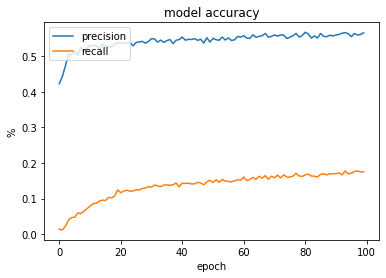

In [16]:
preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall', preds[2])
print('F1',F1)

plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

509/509 [==============================] - 0s 694us/step - loss: 1.8517 - precision: 0.4934 - recall: 0.1403 - accuracy: 0.0000e+00
Precision 0.4934110939502716
Recall 0.14028622210025787
F1 0.2184600646379246


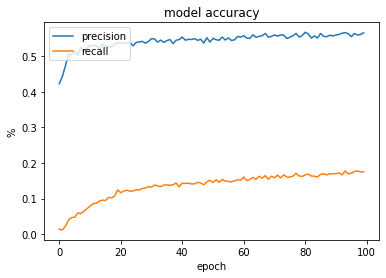

In [17]:
td_predicted = model.evaluate(td,td_y)

F1 = 2 * (td_predicted[1] * td_predicted[2]) / (td_predicted[1] + td_predicted[2])
print('Precision', td_predicted[1])
print('Recall', td_predicted[2])
print('F1',F1)

plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()